In [1]:
import pandas as pd
import glob
lista=[]
for filename in glob.iglob('20*.csv'):
    df=pd.read_csv(filename)
    df["year"]=filename.split('.')[0]+"-12-31"
    lista.append(df)
    
todos=pd.concat(lista)

In [2]:
todos['Country']=todos.Country.str.replace('[^a-zA-Z]', '')

In [32]:
pd.set_option('display.max_rows', None)


In [61]:
todos[todos['Country']=="Belarus"]

,Draw,Country,Artist,Song,Language,Place,Points,year,Language(s)
2,3,Belarus,"Dasha, Alina & Karyna",Serdtse Belarusi,"Russian, Belarusian[22]",6.0,86.0,2008-12-31,NaN
0,1,Belarus,Арина Пехтерева,Пришельцы,NaN,NaN,NaN,2020-12-31,"Russian, English"
6,7,Belarus,Liza Misnikova,Pepelny,"Russian, English",11.0,92.0,2019-12-31,NaN
7,8,Belarus,Daniel Yastremski,Time,"Russian, English",11.0,114.0,2018-12-31,NaN
9,10,Belarus,Ruslan Aslanov,Volshebstvo,"Russian, English[18]",4.0,105.0,2015-12-31,NaN
0,1,Belarus,Nadezhda Misyakova,Sokal,Belarusian,7.0,71.0,2014-12-31,NaN
7,9,Belarus,Alexander Minyonok,Musyka moikh pobed,"Russian, English",7.0,177.0,2016-12-31,NaN
4,5,Belarus,Helena Meraai,I Am the One,Russian,5.0,149.0,2017-12-31,NaN
6,7,Belarus,Ilya Volkov,Poy so mnoy,Russian,3.0,108.0,2013-12-31,NaN
0,1,Belarus,Egor Zheshko,A more-more,Russian,9.0,56.0,2012-12-31,NaN


In [62]:
countries=list(set(todos['Country']))

In [40]:
# Python
import pandas as pd
from fbprophet import Prophet


def forecast_country(country:str,years_into_future:int):
    subset=todos[todos['Country']==country].dropna(axis=0,subset=['Points'])[['year','Points']]
    subset=subset.rename(columns={"year":'ds','Points':'y'})
    subset['ds']=pd.to_datetime(subset['ds'])
    subset.reset_index(inplace=True)
    df = subset
    if df.shape[0] < 3:
        raise Exception('insufficient data')
    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=years_into_future,freq='y')
    forecast = m.predict(future)
    display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
    fig1 = m.plot(forecast)


# Malta

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


,ds,yhat,yhat_lower,yhat_upper
10,2015-12-31,105.508353,50.530158,159.401014
11,2017-12-31,123.411370,70.248446,179.473225
12,2018-12-31,127.701578,75.566547,186.553929
13,2019-12-31,131.960860,77.983920,184.855051
14,2020-12-31,145.539951,89.866165,200.208245


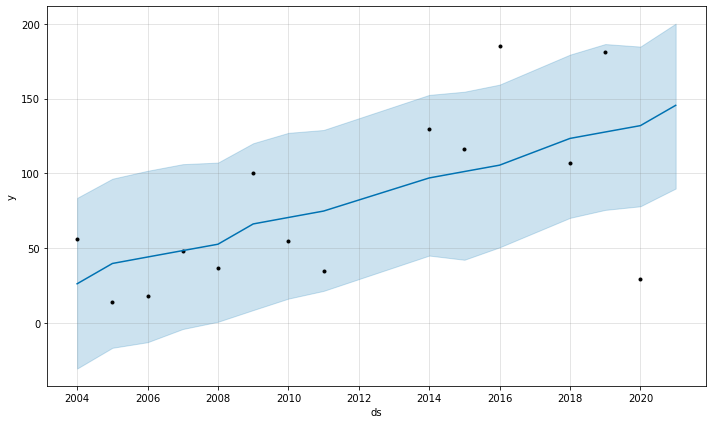

In [41]:
forecast_country(country='Malta',years_into_future=1)

# Rusia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


,ds,yhat,yhat_lower,yhat_upper
11,2016-12-31,139.626192,97.004117,185.821035
12,2017-12-31,132.225918,87.231287,177.598196
13,2018-12-31,123.964936,76.933074,166.842095
14,2019-12-31,114.856385,68.884463,164.835138
15,2020-12-31,149.949880,100.377666,194.998205


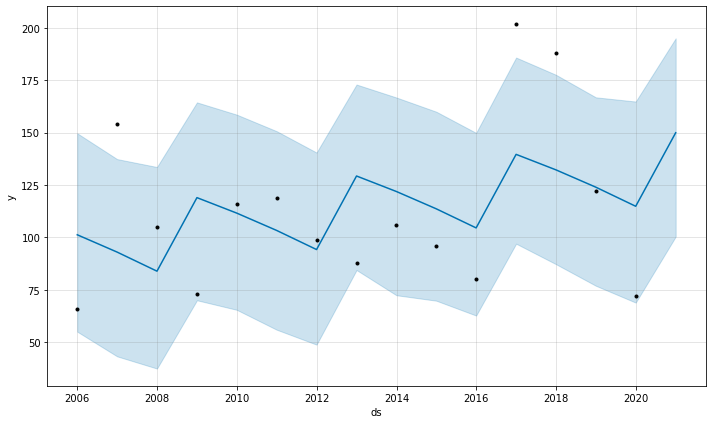

In [42]:
forecast_country(country='Russia',years_into_future=1)

# Ucrania

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


,ds,yhat,yhat_lower,yhat_upper
10,2016-12-31,129.034385,76.366049,181.109526
11,2017-12-31,112.574707,61.164407,166.039069
12,2018-12-31,95.388652,47.317429,147.248241
13,2019-12-31,77.500809,26.866038,128.333624
14,2020-12-31,141.094886,87.692545,193.673992


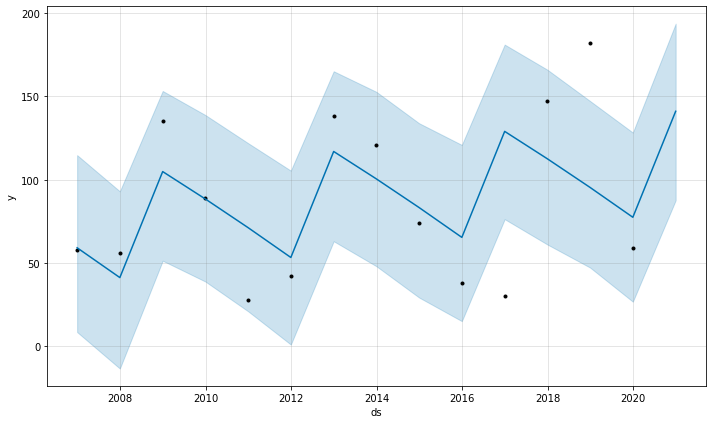

In [43]:
forecast_country(country='Ukraine',years_into_future=1)

# Serbia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


,ds,yhat,yhat_lower,yhat_upper
5,2016-12-31,25.768398,-8.785494,60.213174
6,2017-12-31,47.188970,14.271932,81.373904
7,2018-12-31,68.531028,36.732862,100.394419
8,2019-12-31,89.767188,56.880762,121.228530
9,2020-12-31,21.034000,-12.662675,54.305230


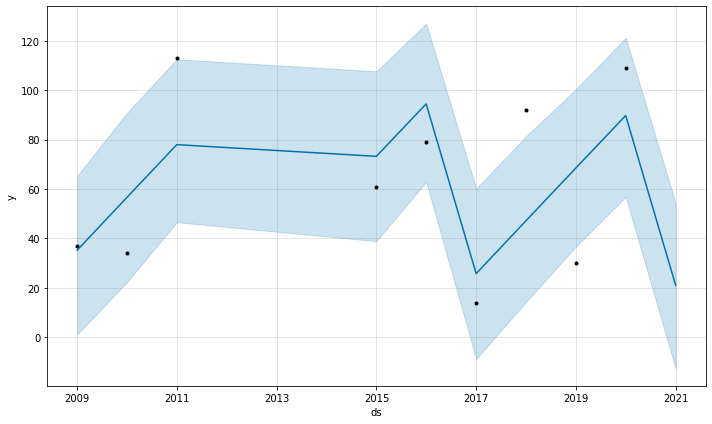

In [44]:
forecast_country(country='Serbia',years_into_future=1)

# Holanda

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.


,ds,yhat,yhat_lower,yhat_upper
13,2016-12-31,123.523813,78.633241,170.139648
14,2017-12-31,125.073557,77.202151,176.191331
15,2018-12-31,126.569820,77.046305,170.204724
16,2019-12-31,128.019467,84.099767,173.427810
17,2020-12-31,151.634961,107.561857,200.949539


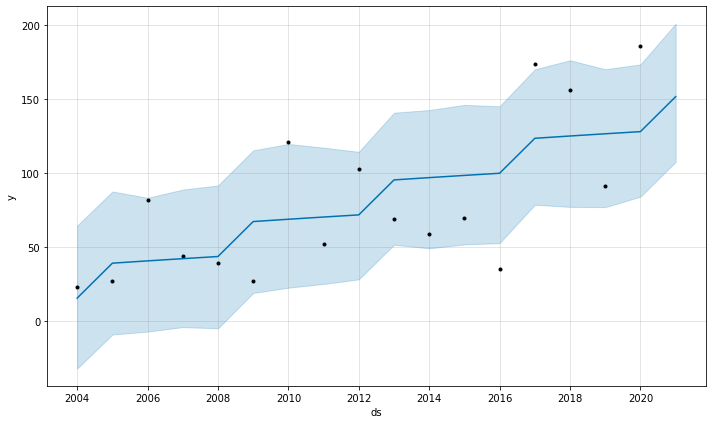

In [59]:
forecast_country(country='Netherlands',years_into_future=1)

# Francia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 1.


,ds,yhat,yhat_lower,yhat_upper
0,2004-12-31,78.00000,78.00000,78.00000
1,2018-12-31,203.00000,203.00000,203.00000
2,2019-12-31,169.00000,169.00000,169.00000
3,2020-12-31,334.21123,334.21123,334.21123


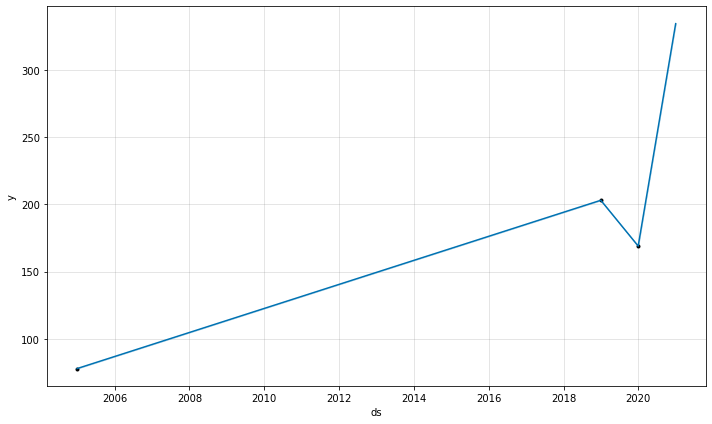

In [58]:
forecast_country(country='France',years_into_future=1)

# Polonia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds,yhat,yhat_lower,yhat_upper
2,2016-12-31,106.156687,60.890134,152.247072
3,2017-12-31,152.644534,111.237400,196.785710
4,2018-12-31,199.131599,152.207131,240.835873
5,2019-12-31,245.576813,197.559268,291.949883
6,2020-12-31,157.333915,109.860598,201.665182


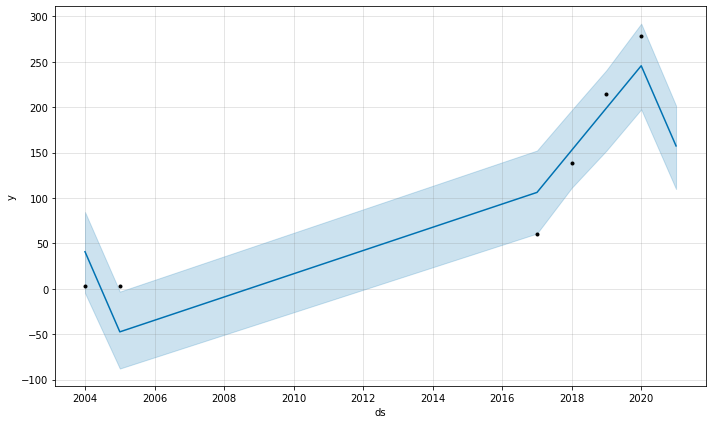

In [57]:
forecast_country(country='Poland',years_into_future=1)

# Bielorrusia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.


,ds,yhat,yhat_lower,yhat_upper
5,2016-12-31,145.956351,112.448846,179.217764
6,2017-12-31,134.887553,102.453955,165.964837
7,2018-12-31,123.798334,91.733154,157.160796
8,2019-12-31,112.713546,79.113689,144.054205
9,2020-12-31,183.068137,152.431586,216.218121


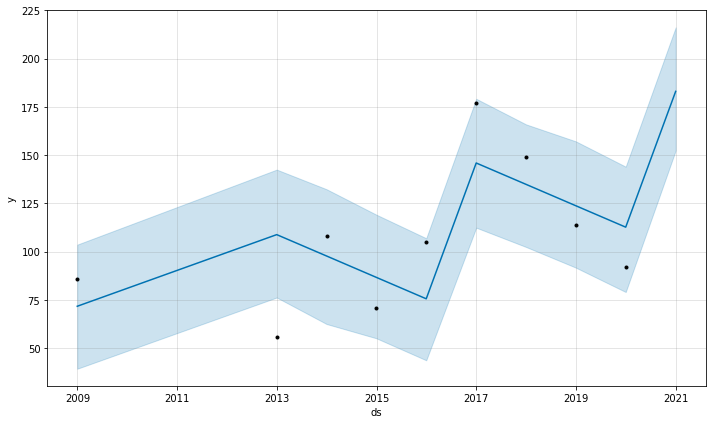

In [48]:
forecast_country(country='Belarus',years_into_future=1)

# España

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.


,ds,yhat,yhat_lower,yhat_upper
1,2004-12-31,155.988364,124.243493,184.862941
2,2005-12-31,145.369953,114.754949,178.145784
3,2006-12-31,135.969580,105.615068,167.720783
4,2019-12-31,204.345443,174.496080,235.815508
5,2020-12-31,258.040210,228.419966,288.490662


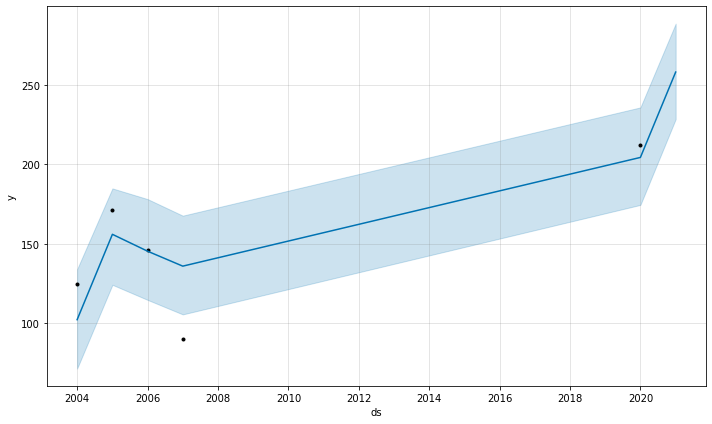

In [49]:
forecast_country(country='Spain',years_into_future=1)

# Alemania

In [50]:
forecast_country(country='Germany',years_into_future=1)

Exception: insufficient data

# Georgia

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 9.


,ds,yhat,yhat_lower,yhat_upper
9,2016-12-31,164.698630,113.673923,217.495187
10,2017-12-31,141.503356,90.134035,197.603600
11,2018-12-31,118.939455,63.056236,171.757819
12,2019-12-31,97.037826,37.118546,150.141193
13,2020-12-31,176.130868,121.256880,227.124136


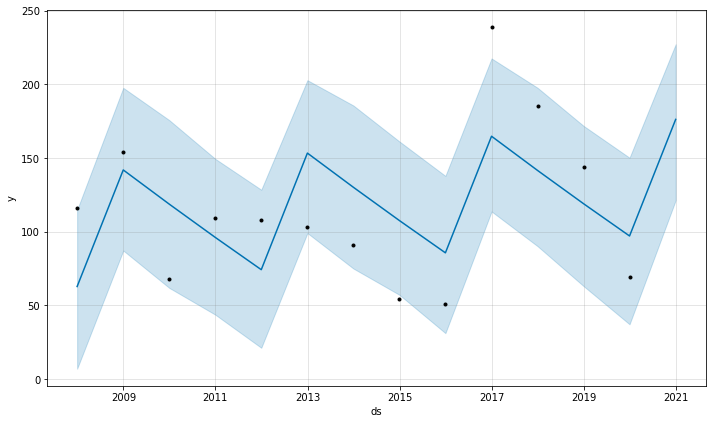

In [51]:
forecast_country(country='Georgia',years_into_future=1)

# Kazajistán

In [53]:
forecast_country(country='Kazakhstan',years_into_future=1)

Exception: insufficient data

In [64]:
pd.read_clipboard()

,Pais,Serie de Tiempo,Categoría,Score,Prediction
0,España,258,Buena,0.7742,357.87180
1,Bielorrusia,183,Buena,0.5387,232.29105
2,Polonia,157,Mala,0.5529,200.40265
3,Holanda,151,Buena,0.7665,208.87075
4,Rusia,149,Mala,0.5233,187.98585
